Inspired by an image deblurring paper: https://ieeexplore.ieee.org/document/6420015

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import ehtim as eh
import numpy as np

# visibilities
INPUT_SIZE = 1030
# pixels in image
OUTPUT_SIZE = 784

In [2]:
IM = eh.image.load_txt('../models/avery_sgra_eofn.txt');
IM = IM.resample_square(28)

def displayImage(arr):
    """Displays image given a flattened array of pixels."""
    IM.imvec = arr
    IM.display()

Loading text image:  ../models/avery_sgra_eofn.txt


In [5]:
def getData(start, end):
    """Reads in visibilities and image from [start, end)."""
    n = end - start
    x, y = np.empty([n, INPUT_SIZE]), np.empty([n, OUTPUT_SIZE])
    for i in range(n):
        obs = eh.obsdata.load_uvfits('../data/trainA/obs{0}.fits'.format(start + i))
        im = eh.image.load_fits('../data/trainB/img{0}.fits'.format(start + i))
        x[i] = obs.data['vis']
        y[i] = im.imvec
    return x, y

In [6]:
x_train, y_train = getData(10000, 18000)

Loading uvfits:  ../data/trainA/obs10000.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  ../data/trainB/img10000.fits
Loading uvfits:  ../data/trainA/obs10001.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  ../data/trainB/img10001.fits
Loading uvfits:  ../data/trainA/obs10002.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  ../data/trainB/img10002.fits
Loading uvfits:  ../data/trainA/obs10003.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  ../data/trainB/img10003.fits
Loading uvfits:  ../data/trainA/obs10004.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  ../data/trainB/img10004.fits
Loading uvfits:  ../data/trainA/obs10005.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Numbe

In [7]:
np.save('x_10000-18000.npy', x_train)
np.save('y_10000-18000.npy', y_train)


In [9]:
x_1 = np.load('x_10000-18000.npy')
y_1 = np.load('y_10000-18000.npy')

In [14]:
# Neural Net
model = Sequential()
model.add(Dense(900, input_dim=INPUT_SIZE, activation='sigmoid'))
model.add(Dense(900, input_dim=INPUT_SIZE, activation='sigmoid'))
model.add(Dense(900, input_dim=INPUT_SIZE, activation='sigmoid'))
model.add(Dense(900, input_dim=INPUT_SIZE, activation='sigmoid'))
model.add(Dense(900, input_dim=INPUT_SIZE, activation='sigmoid'))
model.add(Dense(900, input_dim=INPUT_SIZE, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(900, input_dim=INPUT_SIZE, activation='sigmoid'))
model.add(Dense(900, input_dim=INPUT_SIZE, activation='sigmoid'))
model.add(Dense(900, input_dim=INPUT_SIZE, activation='sigmoid'))
model.add(Dense(900, input_dim=INPUT_SIZE, activation='sigmoid'))
model.add(Dense(900, input_dim=INPUT_SIZE, activation='sigmoid'))
model.add(Dense(900, input_dim=INPUT_SIZE, activation='sigmoid'))
model.add(Dense(OUTPUT_SIZE, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam')
model.fit(x_1, y_1, epochs=50, batch_size=128, validation_split=0.3)

Train on 5600 samples, validate on 2400 samples
Epoch 1/50
5600/5600 [==============================] - 20s 4ms/step - loss: 0.0130 - val_loss: 3.4727e-06
Epoch 2/50
5600/5600 [==============================] - 21s 4ms/step - loss: 3.4794e-06 - val_loss: 3.5561e-06
Epoch 3/50
5600/5600 [==============================] - 22s 4ms/step - loss: 3.4966e-06 - val_loss: 3.5529e-06
Epoch 4/50
5600/5600 [==============================] - 22s 4ms/step - loss: 3.4921e-06 - val_loss: 3.5477e-06
Epoch 5/50
5600/5600 [==============================] - 20s 4ms/step - loss: 3.4865e-06 - val_loss: 3.5417e-06
Epoch 6/50
5600/5600 [==============================] - 20s 4ms/step - loss: 3.4801e-06 - val_loss: 3.5350e-06
Epoch 7/50
5600/5600 [==============================] - 21s 4ms/step - loss: 3.4730e-06 - val_loss: 3.5275e-06
Epoch 8/50
5600/5600 [==============================] - 19s 3ms/step - loss: 3.4652e-06 - val_loss: 3.5192e-06
Epoch 9/50
5600/5600 [==============================] - 19s 3ms/step

In [15]:
%%capture
x_test, y_test = getData(17090, 18000)

Image  17090


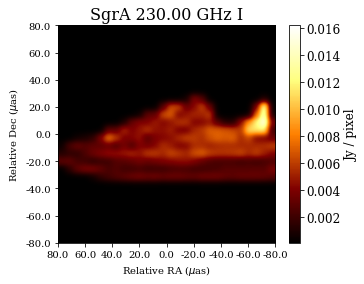

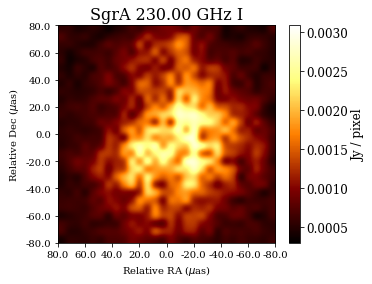

Image  17091


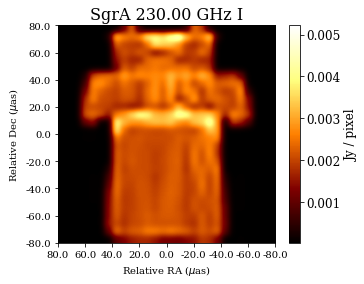

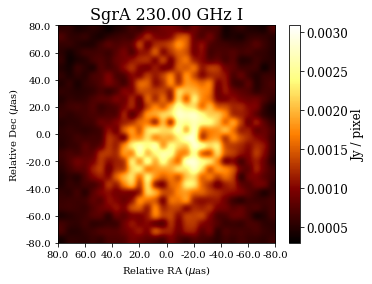

Image  17092


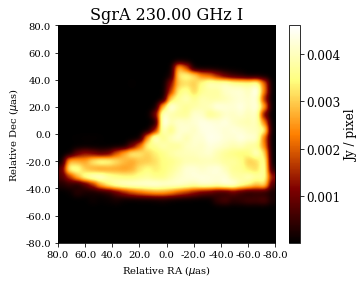

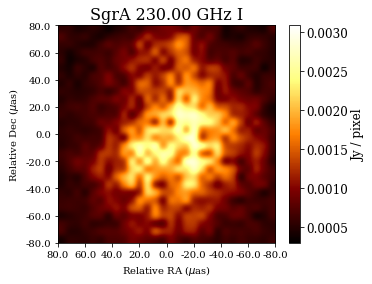

Image  17093


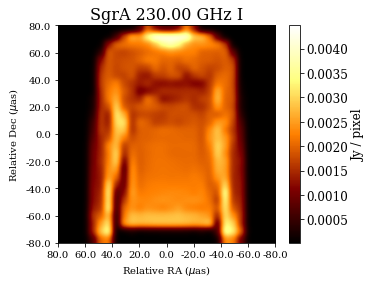

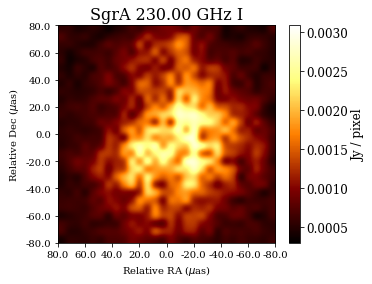

Image  17094


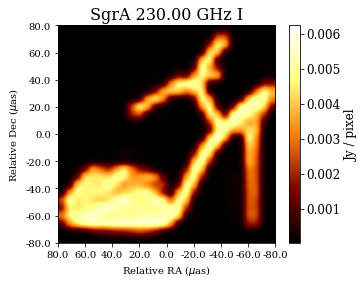

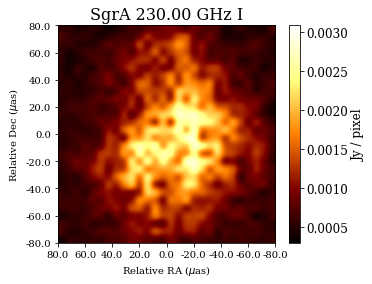

Image  17095


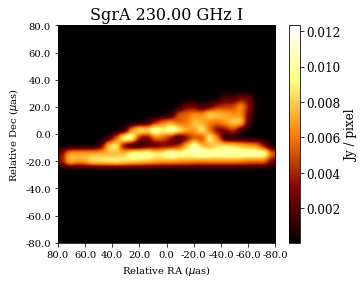

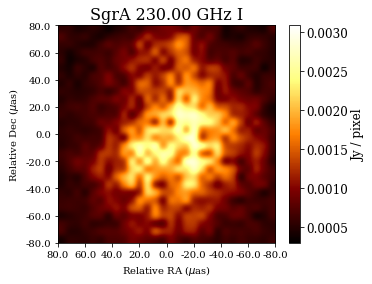

Image  17096


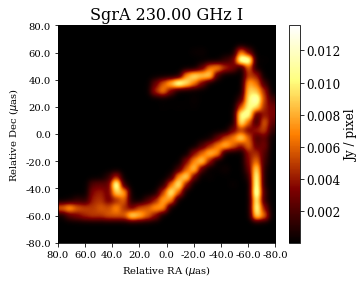

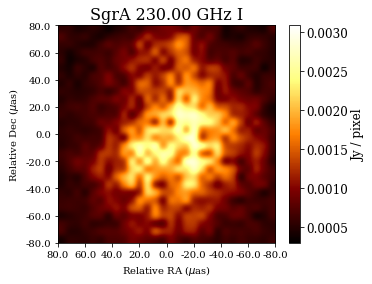

Image  17097


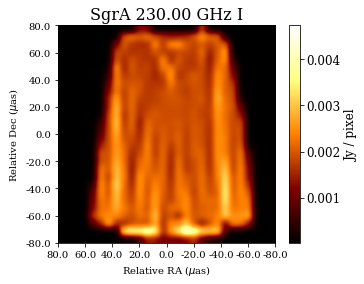

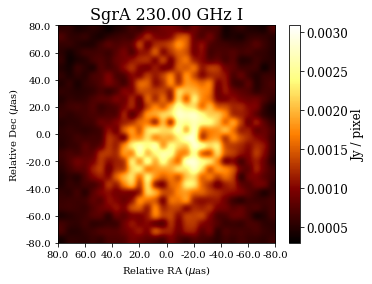

Image  17098


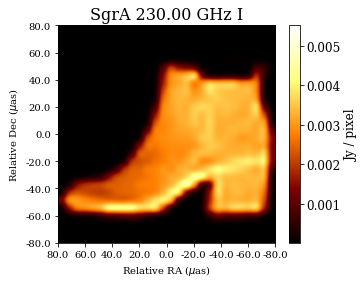

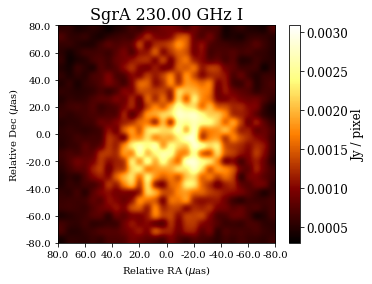

Image  17099


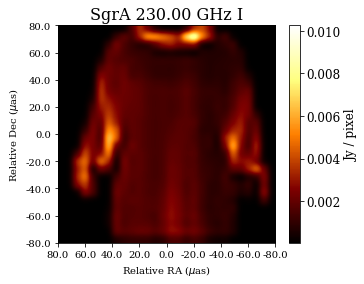

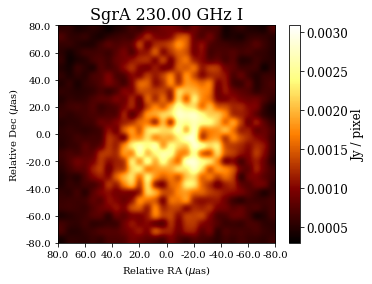

In [16]:
y_predict = model.predict(x_test)
for i in range(10):
    print("Image ", (17090 + i))
    displayImage(y_test[i])
    displayImage(y_predict[i])